## Audio Preprocessing

### Resources

1. Medium - https://medium.com/huawei-developers/basics-of-audio-processing-e69efce7765f
2. Video - https://www.youtube.com/watch?v=O04v3cgHNeM
3. Linkedin - https://www.linkedin.com/pulse/deep-dive-asr-systems-nitin-bhatnagar-b873c/

In [2]:
## Medium Article

In [5]:
!pip install matplotlib scipy librosa soundfile ffmpeg

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.9/101.9 kB 417.1 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 1.9 MB/s eta 0:00:00a 0:00:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 1.4 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 7.4 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 6.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 427.3 kB/s eta 0:00:00a 0:00:01
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6082 sha256=ac9649e0e764b754642a01694496e65f0e7145fa9f078b518fc355965fa42257
  Stored in directory: /tmp/pip-ephem-wheel-cache-14zt0kkj/wheels/26/21/0c/c26e09dff860a9071683e279445262346e008a9a1d2142c4ad
Successfully built ffmpeg


In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os
import librosa
import IPython

In [78]:
audio_files = [file for file in os.listdir("../sample_dataset") if "wav" in file]

In [79]:
audio_file = audio_files[1]

In [80]:
x, sr = librosa.load(f'../sample_dataset/{audio_file}')
print("Sample Point: ", x.shape)
print("Sampling Rate: ", sr)

Sample Point:  (53120,)
Sampling Rate:  22050


In [81]:
IPython.display.Audio(f"../sample_dataset/{audio_file}", rate=sr)

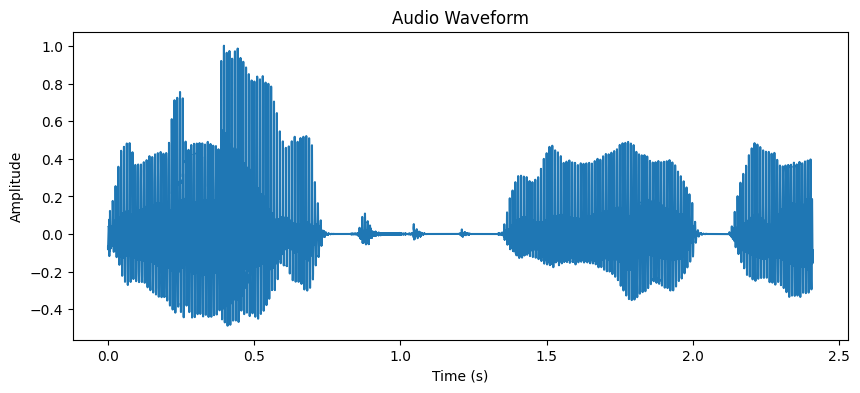

In [82]:
plt.figure(figsize=(10, 4))
plt.plot(np.linspace(0, len(x) / sr, num=len(x)), x)

plt.title("Audio Waveform")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

#### Interpretation

Interpretations: Audio [0]

The waveform appears to have two distinct segments of high amplitude separated by a near-silent region.
This suggests a bimodal speech pattern, possibly two spoken words or syllables with a pause in between.
Silence or Low-Amplitude Region

Around the 0.6s to 1.2s mark, there is a flatline, indicating silence or near silence.
This could be a natural pause in speech or an effect of noise reduction.
Amplitude Variations

The first and second wave clusters have similar patterns, which may indicate repetition or similarity in phonetics.
The waveform envelopes show a gradual rise and fall, which suggests a natural speech dynamic rather than a sudden percussive sound.
Possible Issues

If this were a processed audio file, the silence could indicate hard gating (aggressive noise removal).
If there are distortions or unnatural cutoffs in the waveform, there might be compression artifacts.
Applications in Editing & Mixing

If this is dialogue or vocals, you might apply normalization or compression to even out volume differences.
For music production, this can help in identifying transients, attack, and decay times of notes.

### Feature Extraction

#### MFCC

In [83]:
n_fft=2048
hop_length=512
n_mfcc=13

mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)

# Convert to a decibel scale for better visualization
mfcc_db = librosa.power_to_db(mfccs)

In [84]:
mfccs.shape

(13, 104)

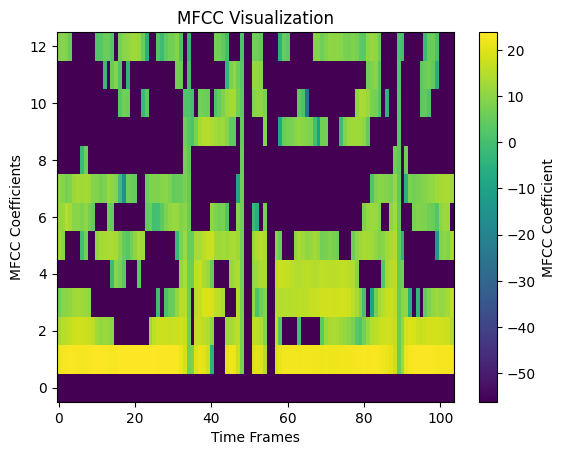

In [75]:
plt.imshow(mfcc_db, aspect='auto', origin='lower')

plt.colorbar(label='MFCC Coefficient')
plt.title('MFCC Visualization')
plt.xlabel('Time Frames')
plt.ylabel('MFCC Coefficients')

plt.show()

## Basic Idea

1. Load the audio
2. resample the audio if required
3. Generate MFCCs/Log-MFCCs
4. Pass to the model